In [149]:
import numpy as np 
import pandas as pd 
from time import time
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("twitter_new.csv", encoding = "ISO-8859-1",header = None)
df.columns = ['labels','user','date','query','username','tweet']


In [151]:
df.head()

,labels,user,date,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [152]:
df['query'].unique()

array(['NO_QUERY'], dtype=object)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   labels    1600000 non-null  int64 
 1   user      1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   tweet     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [154]:
df.describe()

,labels,user
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [155]:
df.labels.unique()

array([0, 4], dtype=int64)

In [156]:
df.labels.value_counts()

0    800000
4    800000
Name: labels, dtype: int64

In [157]:
df.shape

(1600000, 6)

In [158]:
df.columns

Index(['labels', 'user', 'date', 'query', 'username', 'tweet'], dtype='object')

In [159]:
df.drop(['user', 'date', 'query', 'username'], axis=1, inplace=True)

In [160]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import nltk

In [161]:
# Function to remove extra spaces
def Remove_Extra_Spaces(text):
    target_pattern = r'\s+'
    text_without_extra_space = re.sub(pattern=target_pattern, repl=" ", string=text)
    return text_without_extra_space

In [162]:
# Apply function on given dataset
df['tweet'] = df['tweet'].apply(Remove_Extra_Spaces)

In [163]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet'].head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7364\1659006252.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^\w\s]','')


0    switchfoot httptwitpiccom2y1zl  Awww thats a b...
1    is upset that he cant update his Facebook by t...
2    Kenichan I dived many times for the ball Manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no its not behaving at all im ...
Name: tweet, dtype: object

In [164]:
# Apply lower function on given dataset
df['tweet'] = df['tweet'].str.lower()
df.head()

,labels,tweet
0,0,switchfoot httptwitpiccom2y1zl awww thats a b...
1,0,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...


In [165]:
# Importing HTMLParser
from html.parser import HTMLParser
# Parser object
html_parser = HTMLParser()

In [166]:
# import html
import html

temp = html.escape(df['tweet'])
# Using html.unescape() method
df['temp'] = html.unescape(temp)

print(df['temp'])


0          switchfoot httptwitpiccom2y1zl  awww thats a b...
1          is upset that he cant update his facebook by t...
2          kenichan i dived many times for the ball manag...
3            my whole body feels itchy and like its on fire 
4          nationwideclass no its not behaving at all im ...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: temp, Length: 1600000, dtype: object


In [167]:
# Function to remove urls
def remove_url(text):
    url_pattern = re.compile(r'http?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [168]:
# Apply url removal function on given dataset.
df["tweet"] = df["tweet"].apply(lambda text: remove_url(text))
df.head()

,labels,tweet,temp
0,0,switchfoot httptwitpiccom2y1zl awww thats a b...,switchfoot httptwitpiccom2y1zl awww thats a b...
1,0,is upset that he cant update his facebook by t...,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...,nationwideclass no its not behaving at all im ...


In [169]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['tweet'] = df['tweet'].apply(lambda x: remove_emoji(x))

In [170]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: tokenization(x.lower()))
df.head()

,labels,tweet,temp
0,0,"[switchfoot, httptwitpiccom2y1zl, awww, thats,...",switchfoot httptwitpiccom2y1zl awww thats a b...
1,0,"[is, upset, that, he, cant, update, his, faceb...",is upset that he cant update his facebook by t...
2,0,"[kenichan, i, dived, many, times, for, the, ba...",kenichan i dived many times for the ball manag...
3,0,"[my, whole, body, feels, itchy, and, like, its...",my whole body feels itchy and like its on fire
4,0,"[nationwideclass, no, its, not, behaving, at, ...",nationwideclass no its not behaving at all im ...


In [171]:

nltk.download('stopwords')

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['tweet'] = df['tweet'].apply(lambda x: remove_stopwords(x))
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,labels,tweet,temp
0,0,"[switchfoot, httptwitpiccom2y1zl, awww, thats,...",switchfoot httptwitpiccom2y1zl awww thats a b...
1,0,"[upset, cant, update, facebook, texting, might...",is upset that he cant update his facebook by t...
2,0,"[kenichan, dived, many, times, ball, managed, ...",kenichan i dived many times for the ball manag...
3,0,"[whole, body, feels, itchy, like, fire, ]",my whole body feels itchy and like its on fire
4,0,"[nationwideclass, behaving, im, mad, cant, see, ]",nationwideclass no its not behaving at all im ...
5,0,"[kwesidei, whole, crew, ]",kwesidei not the whole crew
6,0,"[need, hug, ]",need a hug
7,0,"[loltrish, hey, long, time, see, yes, rains, b...",loltrish hey long time no see yes rains a bit ...
8,0,"[tatiana_k, nope, didnt, ]",tatiana_k nope they didnt have it
9,0,"[twittera, que, muera, ]",twittera que me muera


In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from time import time
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

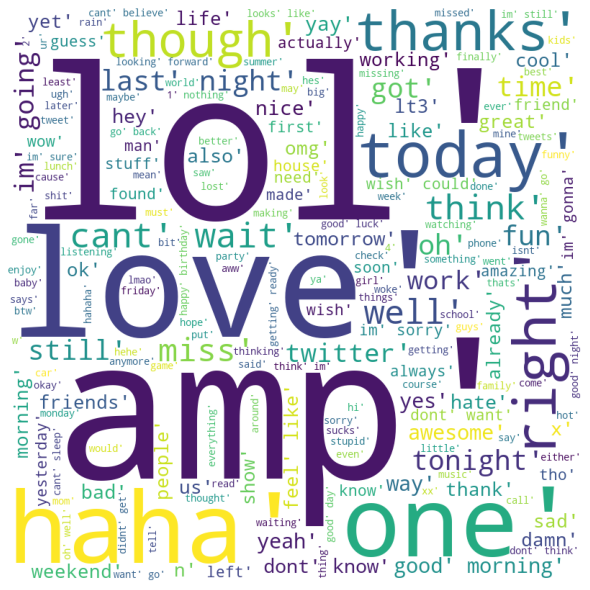

In [173]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.tweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [174]:
text = df.tweet.to_list()
tokens = Tokenizer()
tokens.fit_on_texts(text)

In [175]:
tokens

In [176]:
len(tokens.index_word)

851646

In [177]:
vocab_size = len(tokens.word_index)+1
vocab_size

851647

In [178]:
encoded_text=tokens.texts_to_sequences(text)

In [179]:
max_length=200
x=sequence.pad_sequences(encoded_text,maxlen=max_length,padding='pre')
x

array([[     0,      0,      0, ...,  10101,   1761,      4],
       [     0,      0,      0, ...,      9,    173,   1083],
       [     0,      0,      0, ...,    365,      7,  25733],
       ...,
       [     0,      0,      0, ...,    508,   1921,      1],
       [     0,      0,      0, ..., 139745, 102874,      1],
       [     0,      0,      0, ..., 851645, 851646,      1]])

In [180]:
x.shape

(1600000, 200)

In [181]:
y=df['labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [182]:
y.value_counts()

0    800000
4    800000
Name: labels, dtype: int64

In [183]:
y=y.map({0:0,4:1})
y.shape

(1600000,)

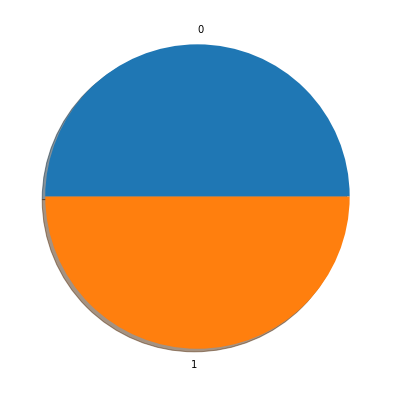

CPU times: total: 125 ms
Wall time: 159 ms


In [184]:
%%time

from matplotlib import pyplot as plt
import numpy as np

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df['labels'].value_counts(), labels = ['0','1'],shadow = True)
 
# show plot
plt.show()

In [185]:
y.value_counts()

0    800000
1    800000
Name: labels, dtype: int64

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [187]:
x_train

array([[     0,      0,      0, ...,    730,    119,  29081],
       [     0,      0,      0, ...,    378,  45542,      1],
       [     0,      0,      0, ...,      6,   5499,      1],
       ...,
       [     0,      0,      0, ...,   4327, 296190,      1],
       [     0,      0,      0, ..., 469469,    484,    987],
       [     0,      0,      0, ...,    515,    284,      1]])

In [188]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty="l2",random_state=42,C=0.01)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Training Accuracy",clf.score(x_train, y_train))
print("Testing Accuracy",clf.score(x_test,y_pred))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy 0.499625
Testing Accuracy 1.0


In [189]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [190]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [191]:
np.array(np.unique(y_pred, return_counts=True)).T

array([[     0,    217],
       [     1, 319783]], dtype=int64)